In [1]:
import pandas as pd
from datetime import datetime
import pylab as plt
import numpy as np
import glob
import os
import sys

In [2]:
atom_merged_file = r"/shared/netscratch/znjs2/atom_data_02_20/MER-1HZ_DC8_20160729_R33.ict" #Path to file
first_line_of_data = pd.read_csv(atom_merged_file, delimiter=',', nrows=1, header=None)
no_of_rows_to_skip = first_line_of_data[0]
no_of_rows_to_skip_integer = no_of_rows_to_skip.item() # This code reads the no. of rows to skip
atom_merged_data = pd.read_csv(atom_merged_file, 
                               delimiter=',', 
                               skiprows= no_of_rows_to_skip_integer - 1, 
                               na_values = [-99999, -9999, -999, -888])

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [36]:
path = r'/shared/netscratch/znjs2/atom_data_02_20' # path to file
all_files = glob.glob(path + "/*.ict")

li = []

for filename in all_files:
    first_line_of_data = pd.read_csv(filename, delimiter=',', nrows=1, header=None)
    no_of_rows_to_skip = first_line_of_data[0]
    no_of_rows_to_skip_integer = no_of_rows_to_skip.item()
    df = pd.read_csv(filename,delimiter=',', 
                     skiprows= no_of_rows_to_skip_integer - 1,
                     index_col=0, 
                     parse_dates=[0],
                     usecols=['UTC_Start','G_LAT', 'G_LONG', 'G_ALT','CH4_PECD',
                              'CH4e_PECD','CH4_GMI','CH4_NOAA','CH4_UCATS','CH4e_UCATS'],
                    na_values='-99999.0')
    #extract start date from filename
    date = filename[53:61]
    datestring = f'{date[0:4]}-{date[4:6]}-{date[6:8]}'
    #convert to datetime
    df['UTC_Start_dt']=pd.to_datetime(df.index, unit='s',  origin = datestring)
    df.index = df['UTC_Start_dt']
    
    #print(df.shape[1])
    li.append(df)

frame = pd.concat(li, axis=0)

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


In [42]:
frame = frame.drop(['UTC_Start_dt'], axis=1)
print(frame[:5])

                        G_LAT     G_LONG  G_ALT  CH4_PECD  CH4e_PECD  CH4_GMI  \
UTC_Start_dt                                                                    
2017-10-27 18:24:34  61.17635 -150.00177  143.0       NaN        NaN      NaN   
2017-10-27 18:24:35  61.17567 -150.00139  154.1       NaN        NaN      NaN   
2017-10-27 18:24:36  61.17499 -150.00101  165.9       NaN        NaN      NaN   
2017-10-27 18:24:37  61.17432 -150.00064  178.8       NaN        NaN      NaN   
2017-10-27 18:24:38  61.17365 -150.00028  192.2       NaN        NaN      NaN   

                     CH4_NOAA  CH4_UCATS  CH4e_UCATS  
UTC_Start_dt                                          
2017-10-27 18:24:34       NaN        NaN         NaN  
2017-10-27 18:24:35       NaN        NaN         NaN  
2017-10-27 18:24:36   1936.23        NaN         NaN  
2017-10-27 18:24:37       NaN        NaN         NaN  
2017-10-27 18:24:38   1934.48        NaN         NaN  


Text(0.5, 1.0, 'CH4')

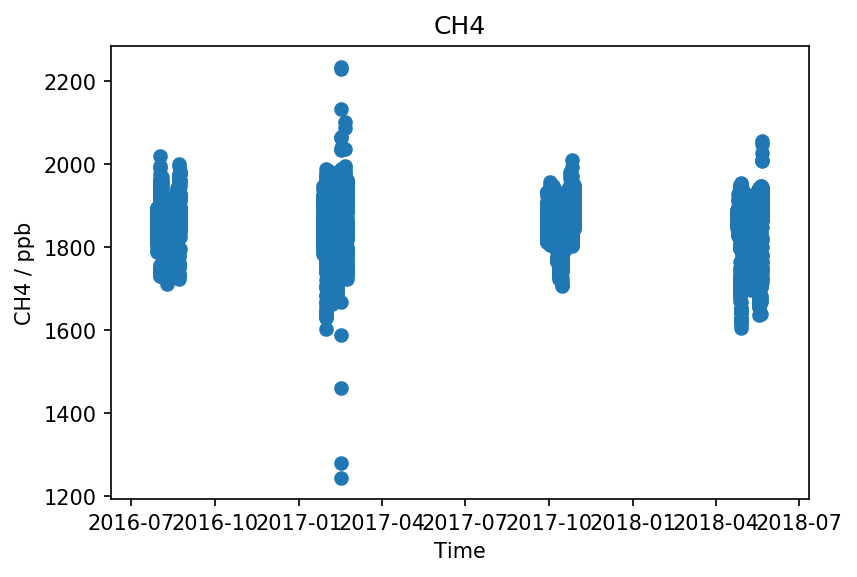

In [38]:
fig = plt.figure(dpi=150)
ax = plt.axes()
x = list(range(len(frame)))
ax.scatter(frame.index, frame.iloc[:,3])
plt.xlabel('Time')
plt.ylabel('CH4 / ppb')
plt.title(f'CH4')

In [43]:
frame.to_csv(r'/home/znjs2/blueberry_11_19/all_atom_ch4_data_datetime.csv')

In [5]:
#datetime conversion and interpolation, not used currently

atom_merged_data['UTC_Start_dt']=pd.to_datetime(atom_merged_data['UTC_Start'], unit='s',  origin = "2016-07-29")

atom_merged_data.index = atom_merged_data['UTC_Start_dt']

#atom_merged_data_resampled = atom_merged_data.resample('0.5S').interpolate() #This code interpolates missing values - you may not actually want this, if not just hash it out.

atom_merged_data.to_csv(r'/home/znjs2/blueberry_11_19/atom_merged_data_2016-07-29') #Saves file to somewhere you like